# 1. Data Preparation

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('skychallenge_car_data.csv')

print(df.head())

In [ ]:
print(df.shape)

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [293]:
drop_columns = ['Unnamed: 0',
                'city',
                'make',
                'cylinders',
                'title_status',
                'vin',
                'drive',
                'size',
                'type',
                'weather',
                'lat',
                'long',
                'county_fips',
                'county_name',
                'state_fips',
                'state_code',
                'state_name',
               'paint_color',
               'manufacturer']
               
clean_df = df.drop(columns=drop_columns)

In [294]:
clean_df = clean_df.drop_duplicates()

In [295]:
clean_df.shape

(905876, 6)

In [296]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905876 entries, 0 to 1723060
Data columns (total 6 columns):
price           905876 non-null int64
year            900987 non-null float64
condition       623684 non-null object
fuel            899850 non-null object
odometer        783402 non-null float64
transmission    900969 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 48.4+ MB


In [297]:
clean_df.isnull().sum()

price                0
year              4889
condition       282192
fuel              6026
odometer        122474
transmission      4907
dtype: int64

In [298]:
clean_df['condition'].value_counts(dropna=False)

NaN          282192
excellent    262762
good         232530
like new      70063
fair          48103
new            5612
salvage        4614
Name: condition, dtype: int64

In [299]:
clean_df['price'] = clean_df['price'][clean_df['price'] > 1000]
clean_df['price'] = clean_df['price'][clean_df['price'] < 350000]

clean_df['odometer'] = clean_df['odometer'][clean_df['odometer'] < 750000]

clean_df = clean_df.dropna()

In [300]:
replace_val = clean_df['odometer'].mean()
clean_df['year'] = clean_df['year'][clean_df['year'] > 1950]
clean_df['year'] = clean_df['year'].fillna(method= 'pad')
clean_df['transmission'] = clean_df['transmission'].fillna(method= 'pad')
clean_df['odometer'] = clean_df['odometer'].replace(to_replace = np.nan, value = replace_val)
clean_df.isnull().sum()

price           0
year            0
condition       0
fuel            0
odometer        0
transmission    0
dtype: int64

In [301]:
# Changing the condition data from object to integer:
# new ---------> 6
# like new ----> 5
# excellent ---> 4
# good --------> 3
# fair --------> 2
# salvage -----> 1

condition = {'new' : 6,
        'like new': 5,
        'excellent': 4,
        'good': 3,
        'fair': 2,
        'salvage': 1
       }

to_replace = condition.keys()
values = condition.values()

clean_df['condition'] = clean_df['condition'].replace(to_replace = to_replace, value =values)

In [302]:
clean_df['condition'].value_counts(dropna=False)

4    233541
3    198609
5     58401
2     27969
6      3176
1      1334
Name: condition, dtype: int64

In [303]:
mean = clean_df['condition'].mean()
condition_mean = mean.round(0)
clean_df['condition'] = clean_df['condition'].replace(to_replace = np.nan, value = condition_mean)

In [304]:
clean_df['condition'].value_counts(dropna=False)

4    233541
3    198609
5     58401
2     27969
6      3176
1      1334
Name: condition, dtype: int64

In [305]:
# Changing the fuel data from object to integer:
# gas ---------> 5
# diesel ------> 4
# hybrid ------> 3
# electric-----> 2
# other -------> 1

fuel = {'gas' : 5,
        'diesel': 4,
        'hybrid': 3,
        'electric': 2,
        'other': 1
       }

to_replace = fuel.keys()
values = fuel.values()
clean_df['fuel'] = clean_df['fuel'].replace(to_replace = to_replace, value =values)

In [306]:
clean_df['fuel'] = clean_df['fuel'].fillna(method= 'pad')

In [307]:
clean_df['fuel'].value_counts(dropna=False)

5    480329
4     33477
3      4634
1      3742
2       848
Name: fuel, dtype: int64

In [308]:
clean_df['transmission'].value_counts(dropna=False)

automatic    451347
manual        63425
other          8258
Name: transmission, dtype: int64

In [309]:
# Changing the transmission data from object to integer:
# automatic ----> 3
# manual -------> 2
# other --------> 1

transmission = {'automatic' : 3,
               'manual': 2,
               'other': 1}

to_replace = transmission.keys()
values = transmission.values()
clean_df['transmission'] = clean_df['transmission'].replace(to_replace = to_replace, value =values)

In [310]:
clean_df.isnull().sum()

price           0
year            0
condition       0
fuel            0
odometer        0
transmission    0
dtype: int64

In [314]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523030 entries, 0 to 1723060
Data columns (total 6 columns):
price           523030 non-null float64
year            523030 non-null float64
condition       523030 non-null int64
fuel            523030 non-null int64
odometer        523030 non-null float64
transmission    523030 non-null int64
dtypes: float64(3), int64(3)
memory usage: 27.9 MB


In [313]:
clean_df.to_csv('skychallenge_clean_data.csv', index = False)

# Ploting the relation between price and other parameters

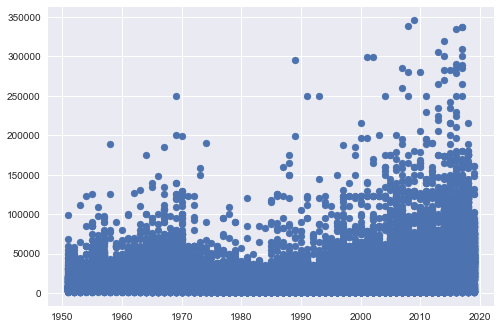

In [287]:
# Realationship between price a a year of prduction

import matplotlib.pyplot as plt

x = clean_df['year']
y = clean_df['price']

plt.scatter(x,y)


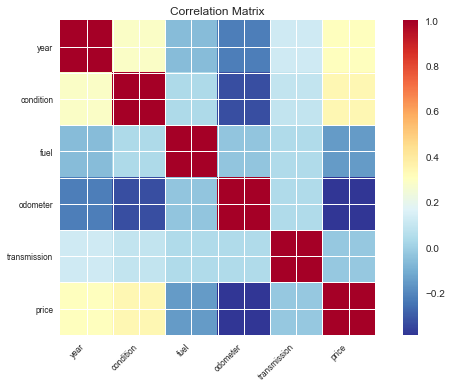

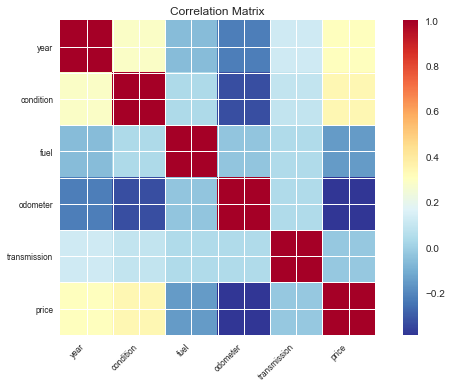

In [288]:
# Correlation graph

from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use('seaborn') 

x = clean_df.drop('price', axis=1)
y = clean_df[['price']]

seed = 10

test_data_size = 0.8

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_data_size, random_state = seed)

train_data = pd.concat([X_train, Y_train], axis = 1)
test_data = pd.concat([X_test, Y_test], axis = 1)

corrMatrix = train_data.corr(method= 'pearson')
xnames = list(train_data.columns)
ynames = list(train_data.columns)

plot_corr(corrMatrix, xnames = xnames, ynames = ynames, title = None, normcolor  = False, cmap='RdYlBu_r')

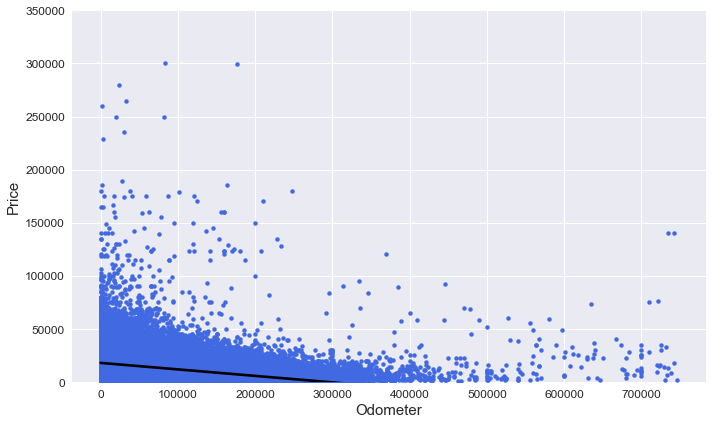

In [290]:
fig, ax = plt.subplots(figsize=(10, 6))


sns.regplot(x='odometer', y='price', ci=None, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})

ax.set_ylabel('Price', fontsize = 15)
ax.set_xlabel("Odometer", fontsize =15)

ax.set_xlim(left = None, right=None)
ax.set_ylim(bottom=0, top = 350000)
ax.tick_params(axis='both', which='major', labelsize = 12)
fig.tight_layout()